In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fuzzywuzzy import process
from fuzzywuzzy import fuzz
import re
import warnings
from IPython.display import display
import os
plt.style.use("seaborn")
%matplotlib inline  

In [2]:
warnings.filterwarnings('ignore') # ignore warnings.
%config IPCompleter.greedy = True # autocomplete feature.
pd.options.display.max_rows = None # set maximum rows that can be displayed in notebook.
pd.options.display.max_columns = None # set maximum columns that can be displayed in notebook.
pd.options.display.precision = 2 # set the precision of floating point numbers.
# pd.set_option('display.max_colwidth', -1) # will help to show all the text strings in the column.

In [3]:
autompg=pd.read_csv('auto-mpg.csv')
autompg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [4]:
autompg.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.00,398.00,398.00,398.00,398.00,398.00,398.00
mean,23.51,5.45,193.43,2970.42,15.57,76.01,1.57
std,7.82,1.70,104.27,846.84,2.76,3.70,0.80
min,9.00,3.00,68.00,1613.00,8.00,70.00,1.00
25%,17.50,4.00,104.25,2223.75,13.83,73.00,1.00
50%,23.00,4.00,148.50,2803.50,15.50,76.00,1.00
75%,29.00,8.00,262.00,3608.00,17.18,79.00,2.00
max,46.60,8.00,455.00,5140.00,24.80,82.00,3.00


In [5]:
autompg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


 <a id=2><h1 align='center'><font color='brown'>Data Cleanig</font> 

<h1 align='left'><font size='4' color='brown'>check the wrong datatypes</font> 

In [6]:
autompg["horsepower"].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [7]:
#as we see for checking for data types 
autompg["horsepower"] = pd.to_numeric(autompg["horsepower"],errors='coerce', downcast='integer')

<h1 align='left'><font size='4' color='brown'>check for missing values</font> 

In [8]:
#checkfor missing values
np.round(autompg.isnull().sum()*100/len(autompg),2)

mpg             0.00
cylinders       0.00
displacement    0.00
horsepower      1.51
weight          0.00
acceleration    0.00
model year      0.00
origin          0.00
car name        0.00
dtype: float64

>as we see that we have missing values in horsepower column as aresult of wrong recording 

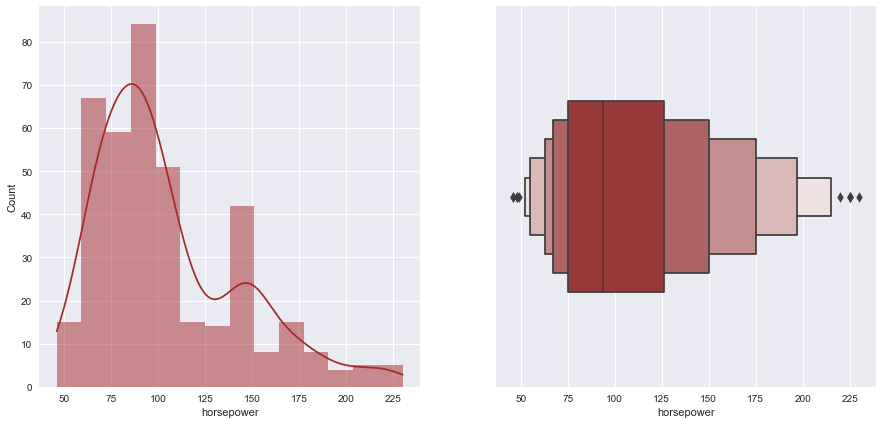

In [9]:
fig, ax =plt.subplots(1,2, figsize=(15,7))
sns.histplot(data=autompg, x='horsepower', kde=True, color='brown', linewidth=0, ax=ax[0])
sns.boxenplot(x='horsepower', color="brown", data=autompg, scale="linear",width = .5, ax=ax[1]);

>as we see that we have outlairs and the scale skewed to the right so its better to impute the missing values with median not mean cuz the mean is sensative to outlairs

In [10]:
autompg['horsepower']=autompg['horsepower'].fillna(autompg['horsepower'].median())

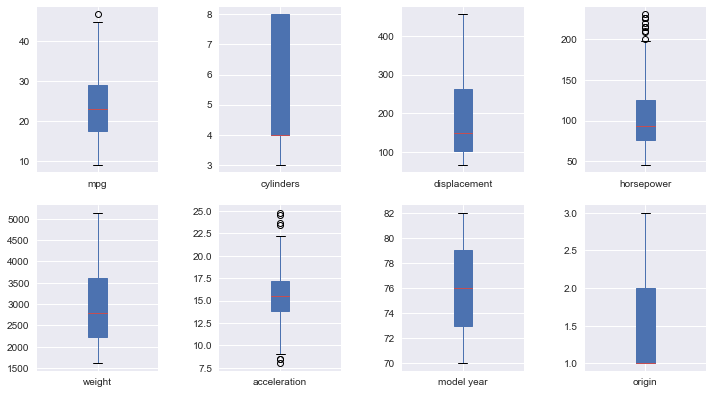

In [11]:
# lets see the outlairs
autompg_numeric_plot=autompg.select_dtypes(exclude=[object])
autompg_numeric_plot.plot(subplots =True, kind = 'box', layout = (4,4), figsize = (12,14),patch_artist=True)
plt.subplots_adjust(wspace = 0.5)

In [12]:
def out_lairs(col):
    """this function take the numeric column and detect the outlairs using interquantile range(IQR)
       that the values that exceed the upper_bound or lower_bound we concider it outlair and explore the origin of it 
    """
    Q1 = autompg[col].quantile(0.25)
    Q3 =  autompg[col].quantile(0.75)
    IQR = Q3-Q1
    data_out = autompg[((autompg[col] < (Q1-1.5*IQR)) | (autompg[col] > (Q3+1.5*IQR)))]
    return data_out[col]  

In [13]:
out_lairs("horsepower")

6      220.0
7      215.0
8      225.0
13     225.0
25     215.0
26     200.0
27     210.0
67     208.0
94     215.0
95     225.0
116    230.0
Name: horsepower, dtype: float64

>so i can ignore these outlairs cuz there are types of cars have a high weight sothat they need a high horsepower to work like(chevy_ pontiac_ buick)

In [14]:
out_lairs("acceleration")

7       8.5
9       8.5
11      8.0
59     23.5
299    24.8
326    23.7
394    24.6
Name: acceleration, dtype: float64

>so we can impute thses outlairs with median

In [15]:
x=autompg["acceleration"].quantile(0.50)
y=autompg["acceleration"].quantile(0.99)
z=autompg["acceleration"].quantile(0.1)
autompg["acceleration"] = np.where(autompg["acceleration"] >y, x, autompg["acceleration"]) 
autompg["acceleration"] = np.where(autompg["acceleration"] <z, x, autompg["acceleration"]) 

In [16]:
out_lairs("mpg")

322    46.6
Name: mpg, dtype: float64

In [17]:
x=autompg["mpg"].quantile(0.50)
y=autompg["mpg"].quantile(0.99)
autompg["mpg"] = np.where(autompg["mpg"] >y, x, autompg["mpg"]) 

In [18]:
autompg["origin"].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

>so as we see that these numbers present the area of manufacture so we can replace these numbers with the places

In [19]:
car_models = pd.Series(['chevrolet', 'dodge',' vw','toyota', 'datsun', 'honda', 'mazda', 'subaru',
                       'maxda', 'nissan', 'capri', 'plymouth', 
                       'buick', 'amc', 'chrysler', 'pontiac', 'ford', 'mercury', 'chevy', 'hi', 
                       'oldsmobile', 'cadillac', 'triumph', 'renault', 'volkswagen ', 'fiat', 'audi','bmw','peugeot','opel','saab','volvo'])

for model in car_models:
    matches = process.extract(model, autompg['car name'], limit = autompg.shape[0])
    for potential_match in matches:
        if potential_match[1] >= 50:
            autompg.loc[autompg['car name'] == potential_match[0], 'car name'] = model
            
autompg['car name'].unique()

array(['chevy', 'buick', 'triumph', 'pontiac', 'ford', 'dodge', 'toyota',
       'audi', 'datsun', 'peugeot', 'saab', 'bmw', 'maxda', 'opel',
       'fiat', 'volvo', 'renault', 'oldsmobile', ' vw', 'mercury'],
      dtype=object)

>as we see that as we see that the resources of manufactured from three fields <strong color="blue">North American_   </strong><strong color="blue">Europe_  </strong><strong color="blue">Asia </strong>

In [20]:
autompg["origin"]=autompg["origin"].astype("category")
autompg["cylinders"]=autompg["cylinders"].astype("category")

In [21]:
mapping={1:"North American",2:"Europe",3:"Asia"}
autompg["origin"]=autompg["origin"].replace(mapping)

In [22]:
autompg["origin"].value_counts()

North American    249
Asia               79
Europe             70
Name: origin, dtype: int64

In [23]:
#check for duplicated values
autompg.duplicated().sum()

0

<a id=2><h1 align='center'><font color='brown'> Data Visualization</font> 

               mpg  displacement  horsepower  weight  acceleration  model year
mpg           1.00         -0.81       -0.77   -0.83          0.30        0.57
displacement -0.81          1.00        0.90    0.93         -0.36       -0.37
horsepower   -0.77          0.90        1.00    0.86         -0.48       -0.41
weight       -0.83          0.93        0.86    1.00         -0.31       -0.31
acceleration  0.30         -0.36       -0.48   -0.31          1.00        0.17
model year    0.57         -0.37       -0.41   -0.31          0.17        1.00


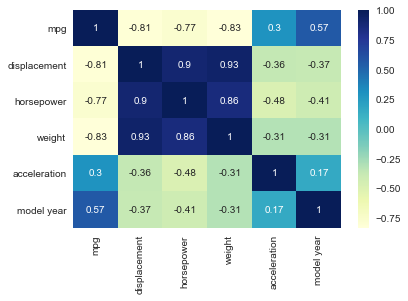

In [32]:
x = autompg.corr()
print (x)
y = np.round(x,2);
plt.show(sns.heatmap(y,annot = True,cmap="YlGnBu"));

<a id=7><strong><font color='blue'>we are gonna show the overall relationships and analyse it separatelly later </font></strong>

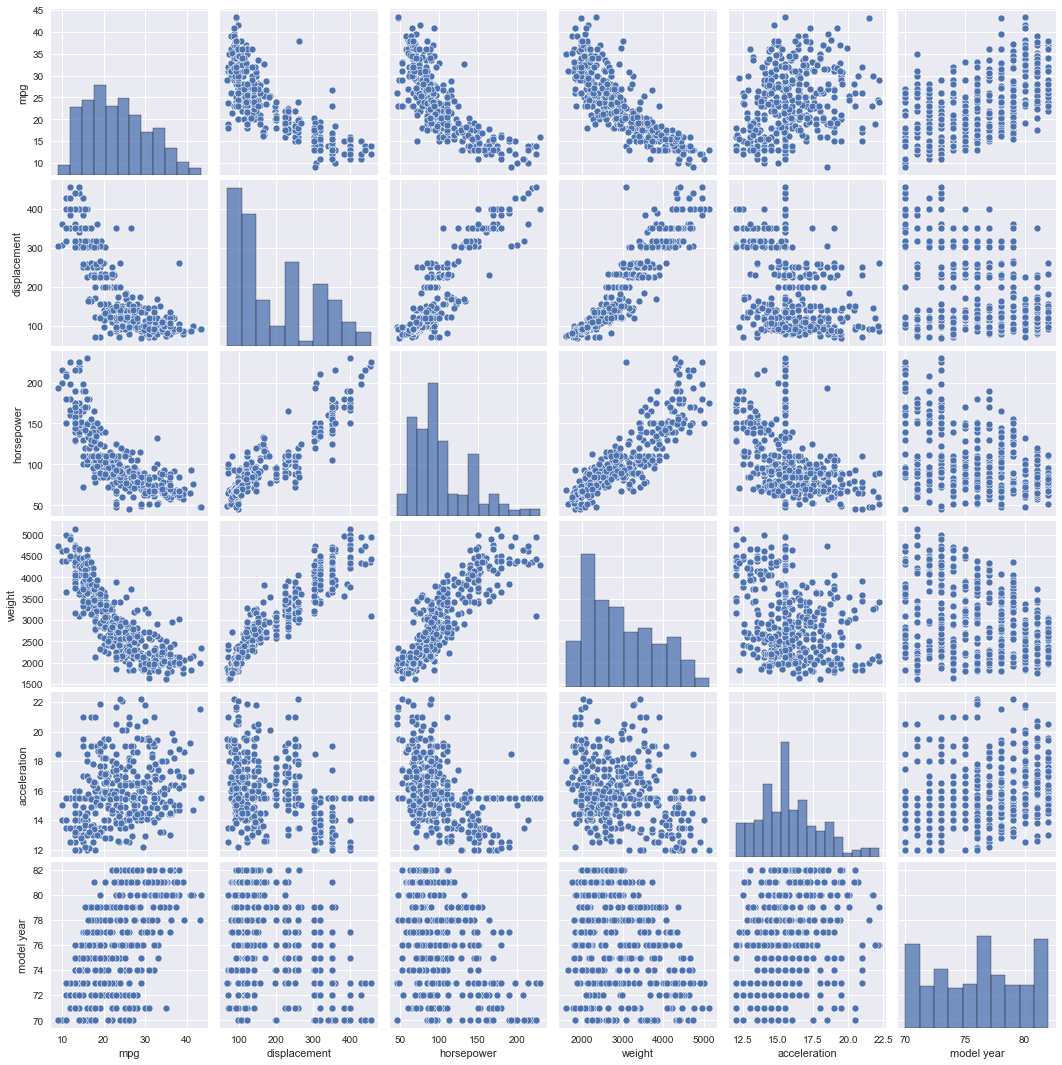

In [33]:
sns.pairplot(autompg.select_dtypes(include = np.number))

<a id=7><strong><font color='blue'>which are the most effective factors on fuel consumbtion  ?</font></strong>

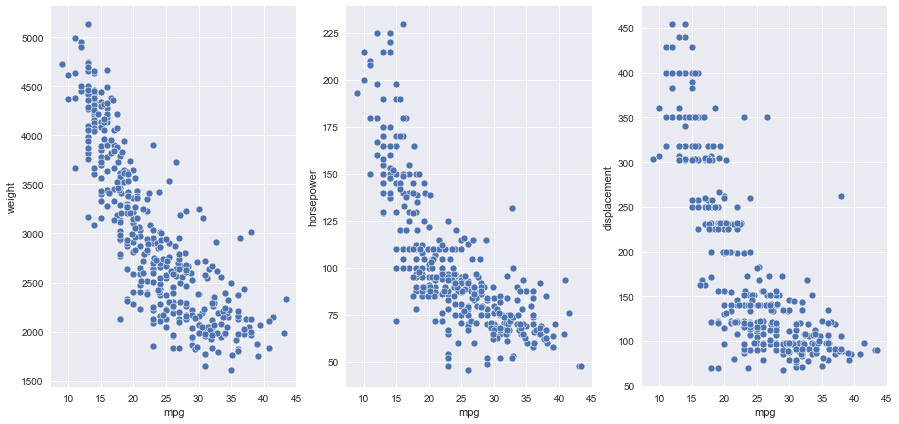

In [35]:
fig, ax =plt.subplots(1,3, figsize=(15,7))
sns.scatterplot(data=autompg, x='mpg',y="weight", ax=ax[0])
sns.scatterplot(x='mpg',y="horsepower",data=autompg, ax=ax[1]);
sns.scatterplot(x='mpg', y="displacement",data=autompg,ax=ax[2]);

><strong><font color='blue'>Be a knowledgeable buyer
Knowing what you need from your vehicle is one of the most important factors in choosing something fuel-efficient that’s right for you.</font></strong>


the relation between<strong><font color='blue'>weight and mpg</font></strong>is negative It makes sense. The more weight you haul, the more resistance you create, and the more fuel you burn. Lighten your load, and you can increase your fuel economy. But at the same time, you’re most likely reducing your profitability .

the relation between<strong><font color='blue'>horsepower and mpg</font></strong>Horsepower is a major factor in a vehicle’s fuel consumption. More power generally means higher fuel consumption. This means you can save money on fuel, and reduce your impact on the environment, by choosing a vehicle with no more horsepower than you need.

the relation between<strong><font color='blue'>displacement and mpg</font></strong>Generally speaking, the higher an engine’s displacement the more power it can create, while the lower the displacement the less fuel it can consume. This is because displacement has a direct impact on how much fuel must be drawn into a cylinder to create power and maintain engine operation

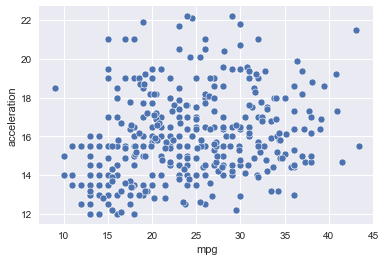

In [36]:
sns.scatterplot(x='mpg',y="acceleration",data=autompg);

>the relation between<strong><font color='blue'>acceleration and mpg</font></strong>The higher your acceleration, the more fuel you're using. In general, it is more efficient to accelerate quickly to your desired speed. If you accelerate quickly, but not so quickly that your RPMs are climbing too high, you get the best fuel economy.

<strong><font color='blue'>Whenever you are looking for a new car, you need to ask what you need from the vehicle. Are you looking for great fuel economy for your commute, or are you looking for more power and performance for either business or pleasure?</font></strong>

<AxesSubplot:xlabel='cylinders', ylabel='count'>

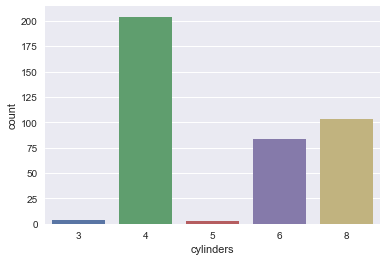

In [37]:
sns.countplot(x="cylinders",data=autompg)

<AxesSubplot:xlabel='weight', ylabel='cylinders'>

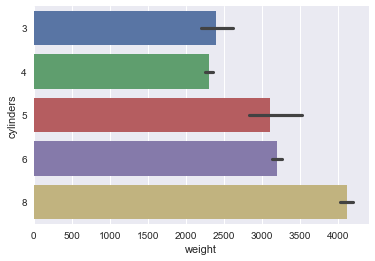

In [38]:
sns.barplot(x="weight",y="cylinders",data=autompg)

>so as we see that the cars that have higher weight have more cylinders and we will get that the fewer cars or small cars focus on great (fuel economy) but the higher and heavier cars focus on power and perfomance and donn have any proplems in fuel consumption so we will discuss that in general that cars need more cylinders like automopile cars and sports cars so they need the power for that



<strong><font color='blue'>In general, you will get more fuel economy from a 4-cylinder engine.       
You will typically get more power and performance from a morecylinder engine.        
If you are in the market for a smaller car, you will likely have a 4-cylinder engine.       
For towing, morecylinders would be the way to go for you.</font></strong>

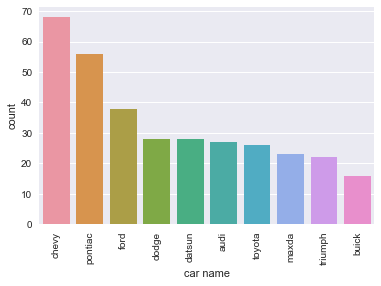

In [39]:
sns.countplot(data=autompg,x="car name",order=autompg['car name'].value_counts().index[:10])
plt.xticks(rotation=90);    

<AxesSubplot:xlabel='car name'>

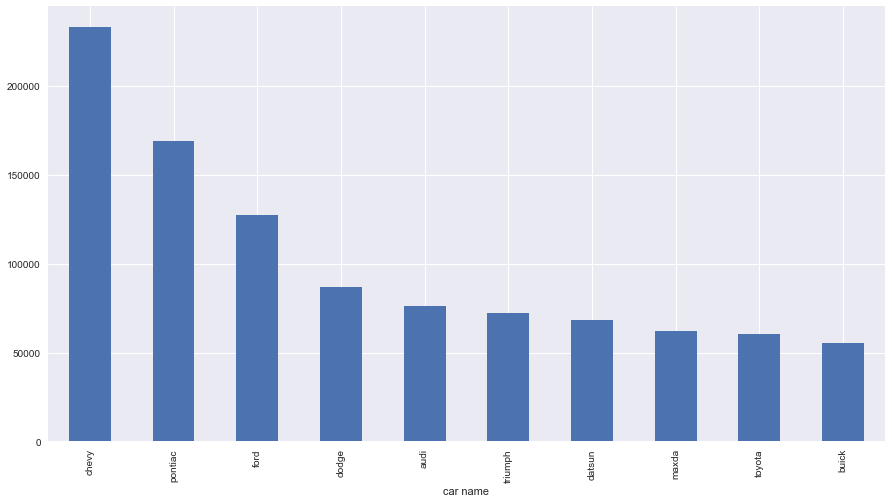

In [40]:
df =autompg.groupby(['car name'])['weight'].sum().sort_values(ascending=False).head(10)
df.plot.bar(figsize=(15,8))

<AxesSubplot:xlabel='car name'>

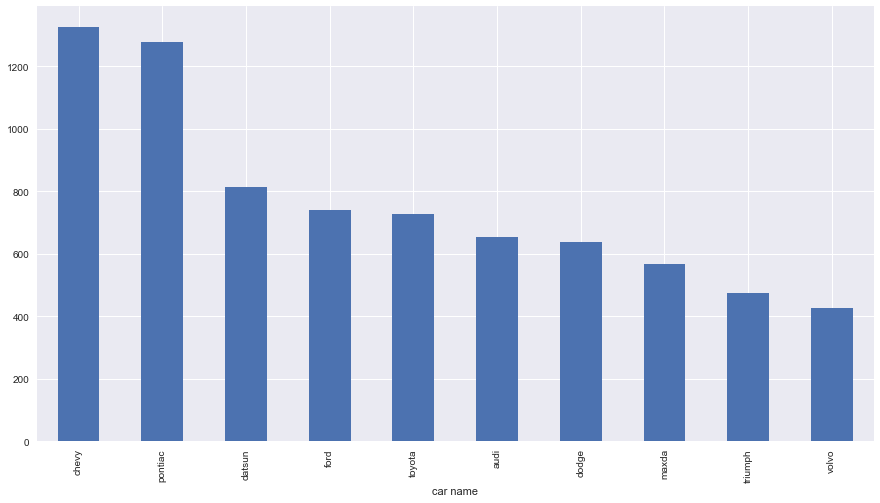

In [41]:
df =autompg.groupby(['car name'])['mpg'].sum().sort_values(ascending=False).head(10)
df.plot.bar(figsize=(15,8))

<AxesSubplot:xlabel='car name,mpg'>

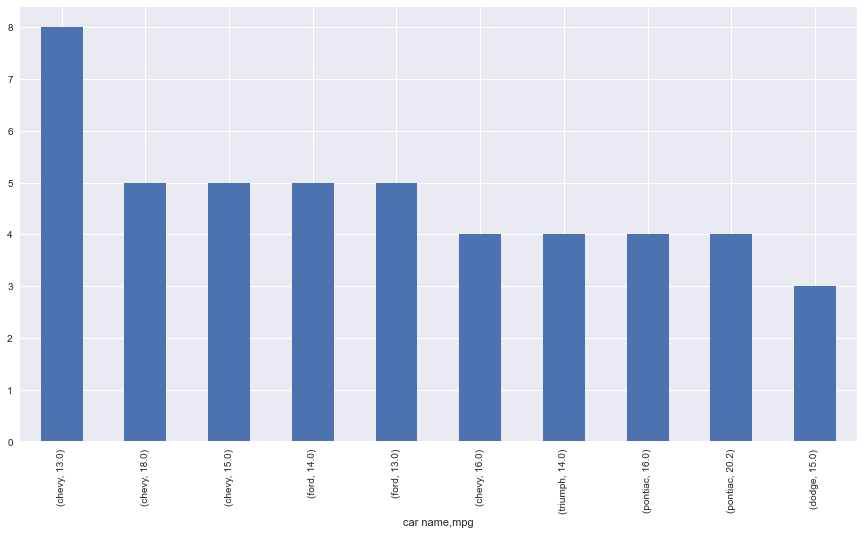

In [42]:
df =autompg.groupby(['car name'])['mpg'].value_counts().sort_values(ascending=False).head(10)
df.plot.bar(figsize=(15,8))

>as we see from two figures that above that the most ten cars that have same higher weight ,cylinders ,and mpg and that men that these cars have high fuel cosumption thatwhy they focus only on berformance and have high prices

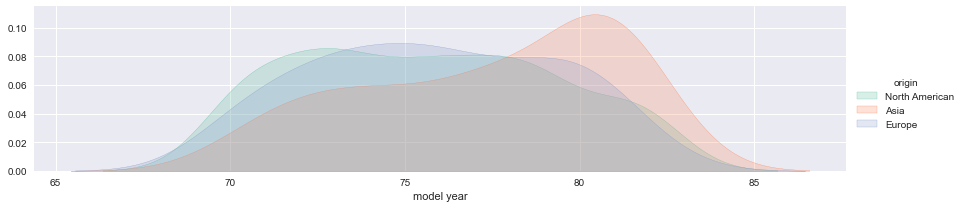

In [43]:
gender_rate=sns.FacetGrid(data=autompg,hue="origin",aspect=4,palette="Set2")
gender_rate.map(sns.kdeplot,"model year",shade=True)
gender_rate.add_legend()

>as we understand from the graph that 70-75th North america have the highest rate in making cars and 75-80th still keep but in the latest begin to decrease in rating and from the last of this beriod Asia begin to increase in rating 